In [18]:
import time
import math
import matplotlib.pyplot as plt
import os
import numpy as np   


In [17]:
def ttnfind_thre(resulta,thre0):
    threl=np.arange(0,15,0.2)
    fpl=[]
    for thre in threl:
        con1=np.where((resulta[:,0]-resulta[:,1]>thre))
        fp=len(con1[0])/len(resulta)
        fpl.append(fp)
    fpl=np.array(fpl)
    con=np.where(abs(fpl-thre0)==np.min(abs(fpl-thre0)))
    #print(threl[con][0])
    threl=np.arange(threl[con][0]-1.5,threl[con][0]+1.5,0.001)
    fpl=[]
    for thre in threl:
        con1=np.where((resulta[:,0]-resulta[:,1]>thre))
        fp=len(con1[0])/len(resulta)
        fpl.append(fp)
    fpl=np.array(fpl)
    con=np.where(abs(fpl-thre0)==np.min(abs(fpl-thre0)))
    return(threl[con][0],fpl[con][0])

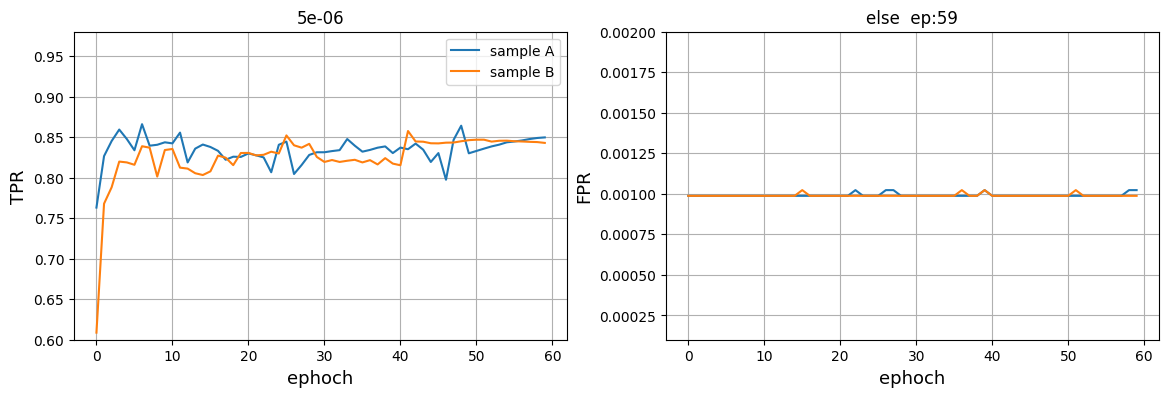

In [13]:
colors=['pink','gray','cornflowerblue','orange']
path0="../result/"

lrl=[5e-6]  

FPR=0.001
for i2 in range(1):
    plt.figure(figsize=(14,4))
    lr=lrl[i2]
    ploti=0

    pathr=path0+"dgmodel_sampleA_"+str(lri)+"/"       
    ntresult=[]
    tresult=[]
    for epi in range(60):
        if os.path.exists(pathr+"result_dg" + str(epi)+".npy"):
            result=np.load(pathr+"result_dg" + str(epi)+".npy")
            if len(result.shape)==2:
                num=6929
                resulta=result[num:len(result)]
                result=result[0:num]
                thre,nfalse=ttnfind_thre(resulta,FPR)
                ntresult.append([epi,len(resulta),thre,nfalse])
                con=np.where((result[:,0]>result[:,1]))
                con1=np.where(((result[:,0]-result[:,1])>thre))
                con2=np.where((resulta[:,0]-resulta[:,1]<thre))
                tresult.append([epi,len(con1[0])/len(result),nfalse])
        
    if len(tresult)>3:
        ploti+=1
        tresult=np.array(tresult)
        plt.subplot(1,2,1)
        plt.title(lr)
        plt.ylim(0.75,0.98)
        plt.xlabel("ephoch",fontsize=13)
        plt.ylabel("TPR",fontsize=13)
        plt.plot(tresult[:,0],tresult[:,1],label="sample A")
        plt.subplot(1,2,2)
        plt.title("else  ep:"+str(epi))
        
        plt.plot(tresult[:,0],tresult[:,2])
        plt.ylim(0.0001,0.002)
        np.save(pathr+"result",tresult)

    
    pathr=path0+"dgmodel_sampleB_"+str(lri)+"/"       
    ntresult=[]
    tresult=[]
    for epi in range(60):
        if os.path.exists(pathr+"result_dg" + str(epi)+".npy"):
            result=np.load(pathr+"result_dg" + str(epi)+".npy")
            if len(result.shape)==2:
                num=6814
                resulta=result[num:len(result)]
                result=result[0:num]
                thre,nfalse=ttnfind_thre(resulta,FPR)
                ntresult.append([epi,len(resulta),thre,nfalse])
                con=np.where((result[:,0]>result[:,1]))
                con1=np.where(((result[:,0]-result[:,1])>thre))
                con2=np.where((resulta[:,0]-resulta[:,1]<thre))
                tresult.append([epi,len(con1[0])/len(result),nfalse])
        
    if len(tresult)>3:
        ploti+=1
        tresult=np.array(tresult)
        plt.subplot(1,2,1)
        plt.title(lr)
        plt.ylim(0.6,0.98)
        plt.plot(tresult[:,0],tresult[:,1],label="sample B")
        plt.legend()
        plt.subplot(1,2,2)
        plt.xlabel("ephoch",fontsize=13)
        plt.ylabel("FPR",fontsize=13)
        plt.plot(tresult[:,0],tresult[:,2])
        plt.ylim(0.0001,0.002)
        np.save(pathr+"result",tresult)
    if ploti>0:
        plt.subplot(1,2,1)
        plt.grid()
        plt.subplot(1,2,2)
        plt.grid()
        plt.show()
    plt.close()

run==================-------------------------------------------------======================== 0

======================================================== sample1


======================================================== sample1



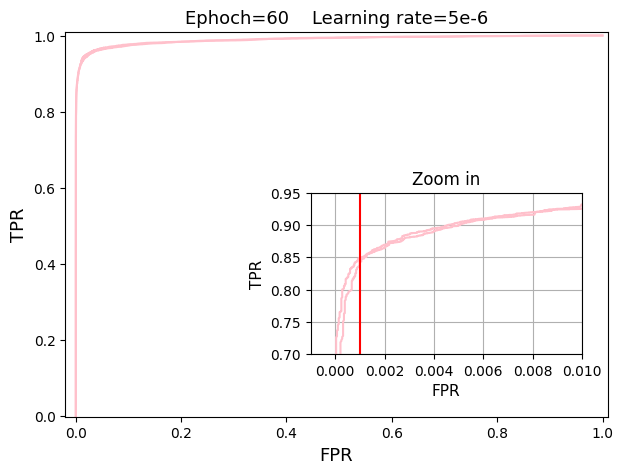

In [16]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
aaresult=[]
print("run==================-------------------------------------------------========================",lii)
for i2 in range(1):
    lr=lrl[i2]
    pathr=path0+"dgmodel_sampleA_"+str(lri)+"/"       
    for epi in range(59,60):
        if os.path.exists(pathr+"result_dg" + str(epi)+".npy"):
            result=np.load(pathr+"result_dg" + str(epi)+".npy")
            if len(result.shape)==2:
                num=6929
                resulta=result[num:len(result)]
                result=result[0:num]
                tresult=[]        
                threl1=np.arange(-11,11,0.001)
                for thre1 in threl1:
                    con1=np.where(((result[:,0]-result[:,1])>thre1))
                    con2=np.where(((resulta[:,0]-resulta[:,1])>thre1))
                    tresult.append([epi,len(result),len(con1[0]),len(con1[0])/len(result),len(resulta),len(con2[0]),len(con2[0])/len(resulta)])
                
                
                atresult1=np.array(tresult)
                aaresult.append(atresult1)
                print("\n========================================================","sample1\n")

    pathr=path0+"dgmodel_sampleB_"+str(lri)+"/"       
    for epi in range(59,60):
        if os.path.exists(pathr+"result_dg" + str(epi)+".npy"):
            result=np.load(pathr+"result_dg" + str(epi)+".npy")
            if len(result.shape)==2:
                num=6814
                resulta=result[num:len(result)]
                result=result[0:num]
                tresult=[]        
                threl1=np.arange(-11,11,0.001)
                for thre1 in threl1:
                    con1=np.where(((result[:,0]-result[:,1])>thre1))
                    con2=np.where(((resulta[:,0]-resulta[:,1])>thre1))
                    tresult.append([epi,len(result),len(con1[0]),len(con1[0])/len(result),len(resulta),len(con2[0]),len(con2[0])/len(resulta)])
                
                
                atresult2=np.array(tresult)
                print("\n========================================================","sample1\n")
                aaresult.append(atresult2)


fig, ax = plt.subplots(figsize=(7, 5))
# 定义嵌套子图的大小和位置
inset_ax = inset_axes(ax, width="50%", height="60%", bbox_to_anchor=(-0.035, -0.1, 1, 0.7),  # 精确控制位置
                      bbox_transform=ax.transAxes)  # width 和 height 是相对于主图的百分比
for atresult1 in aaresult:
    
    ax.plot(atresult1[:,6],atresult1[:,3],c=colors[0],label="sky0 sample1")
    inset_ax.plot(atresult1[:,6],atresult1[:,3],c=colors[0],label="sky0 sample1")
    
#ax.legend(loc=3)
ax.set_xlabel("FPR",fontsize=13)
ax.set_ylabel("TPR",fontsize=13)
ax.set_title("Ephoch=60    Learning rate=5e-6",fontsize=13)
ax.set_xlim(-0.02,1.01)
ax.set_ylim(-0.001,1.01)
inset_ax.plot([0.001,0.001],[0,1.5],c='r')
inset_ax.set_title("Zoom in")
inset_ax.set_xlim(-0.001,0.01)
inset_ax.set_ylim(0.7,0.95)
#inset_ax.text(0.0012,0.95,"FPR=0.001",c='r')
inset_ax.set_xlabel("FPR",fontsize=11)
inset_ax.set_ylabel("TPR",fontsize=11)
inset_ax.grid()
#pathp="/home/quhan/ML_try/png/"
#fig.savefig(pathp+"n224newset10_TPR_Vit.png",dpi=200,bbox_inches='tight')        
